## Titanic prediction with random forest

In [1]:
#Data visualisation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree, export_text

#Machine Learning models
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier

#### Get the data

In [2]:
train_df = pd.read_csv(r"C:\Users\Lokesh\OneDrive\Desktop\train.csv", index_col ='PassengerId')
test_df = pd.read_csv(r"C:\Users\Lokesh\OneDrive\Desktop\test.csv", index_col ='PassengerId')

#### Visualize the dataset

In [3]:
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train_df.tail()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [6]:
train_df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [8]:
# Correlating features Pclass and Survived
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [9]:
# Correlating features Sex and Survived
train_df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [10]:
# Correlating features SibSp and Survived
train_df[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [11]:
# Correlating featues Parch and Survived
train_df[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


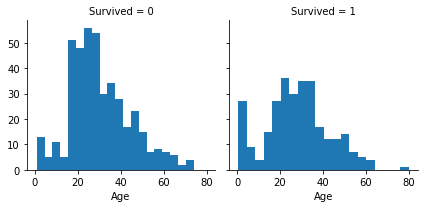

In [12]:
# Plotting age and survived
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Age', bins=20)

C:\Users\Lokesh\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


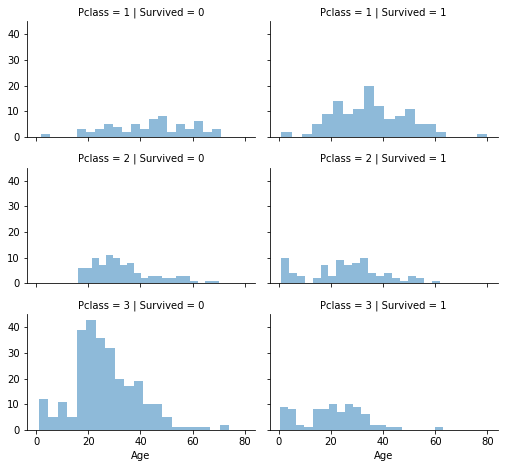

In [13]:
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

C:\Users\Lokesh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


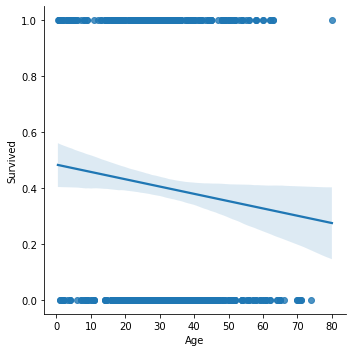

In [14]:
sns.lmplot('Age','Survived',data=train_df)

C:\Users\Lokesh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


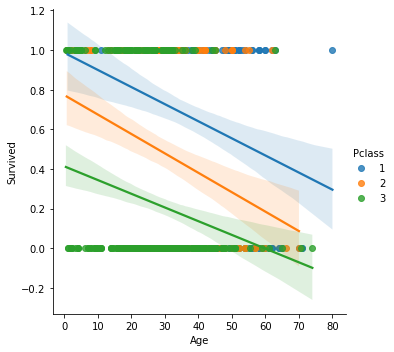

In [15]:
sns.lmplot('Age','Survived',data=train_df,hue='Pclass')

C:\Users\Lokesh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


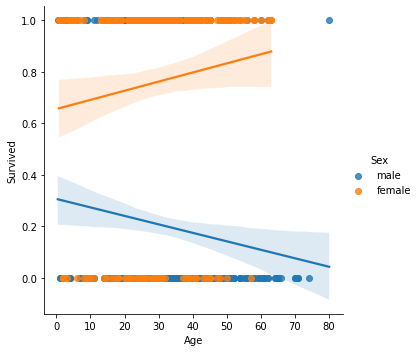

In [16]:
sns.lmplot('Age','Survived',data=train_df,hue='Sex')

C:\Users\Lokesh\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\Lokesh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


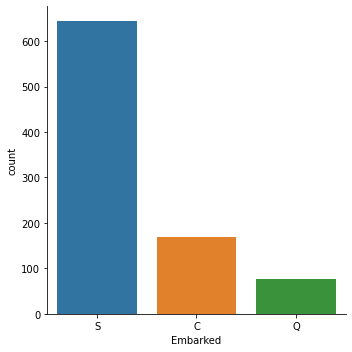

In [17]:
sns.factorplot('Embarked',data=train_df,kind='count')

C:\Users\Lokesh\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\Lokesh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


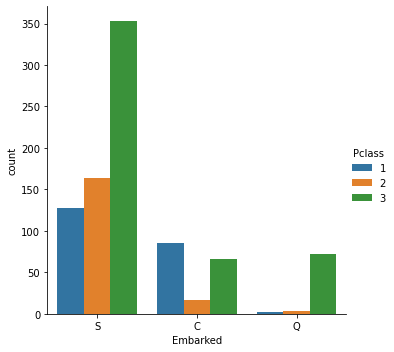

In [18]:
sns.factorplot('Embarked',data=train_df,hue='Pclass',kind='count')

C:\Users\Lokesh\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\Lokesh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


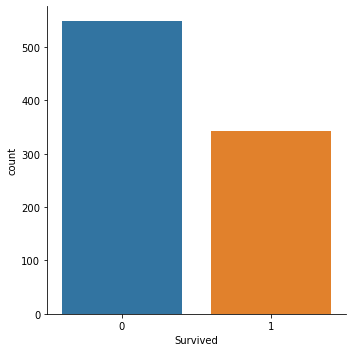

In [19]:
sns.factorplot('Survived',data=train_df,kind='count')

#### Check the missing values

In [20]:
print((train_df.isnull().sum().sort_values(ascending=False)*100)/train_df.shape[0])
print((test_df.isnull().sum().sort_values(ascending=False)*100)/test_df.shape[0])

Cabin       77.104377
Age         19.865320
Embarked     0.224467
Survived     0.000000
Pclass       0.000000
Name         0.000000
Sex          0.000000
SibSp        0.000000
Parch        0.000000
Ticket       0.000000
Fare         0.000000
dtype: float64
Cabin       78.229665
Age         20.574163
Fare         0.239234
Pclass       0.000000
Name         0.000000
Sex          0.000000
SibSp        0.000000
Parch        0.000000
Ticket       0.000000
Embarked     0.000000
dtype: float64


#### We can drop the variables "ticket" and "cabin," and we can extract additional data from the name variable, such as titles.

In [21]:
#Title Extarction
train_df['Title'] = train_df.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
test_df['Title'] = test_df.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(train_df['Title'], train_df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [22]:
# Combining large number of titles into fewer ones
combine_df = [train_df,test_df]
for dataset in combine_df:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Remaining')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).count()

,Title,Survived
0,Master,40
1,Miss,185
2,Mr,517
3,Mrs,126
4,Remaining,23


Variables can drop now

In [23]:
#Drop the Name variable
train_df = train_df.drop(["Name"], axis=1)
test_df = test_df.drop(["Name"], axis=1)

In [24]:
#Drop the Ticket variable
train_df = train_df.drop(["Ticket"], axis=1)
test_df = test_df.drop(["Ticket"], axis=1)

In [25]:
#Drop the Cabin variable
train_df = train_df.drop(["Cabin"], axis=1)
test_df = test_df.drop(["Cabin"], axis=1)

SibSp and Parch can be combined into a single variable called Family.

In [26]:
train_df['Family'] = np.where(train_df['SibSp'] + train_df['Parch'] > 0, 1, 0)
test_df['Family'] = np.where(test_df['SibSp'] + test_df['Parch'] > 0, 1, 0)
train_df.drop(['SibSp', 'Parch'], axis= 1, inplace= True)
test_df.drop(['SibSp', 'Parch'], axis= 1, inplace= True)

In [27]:
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,Family
PassengerId,,,,,,,,
1,0,3,male,22.0,7.2500,S,Mr,1
2,1,1,female,38.0,71.2833,C,Mrs,1
3,1,3,female,26.0,7.9250,S,Miss,0
4,1,1,female,35.0,53.1000,S,Mrs,1
5,0,3,male,35.0,8.0500,S,Mr,0


#### Lets assign the missing values

In [28]:
#Imputation of Variable Age
train_df['Age'] = train_df.Age.fillna(train_df.Age.mean())
test_df['Age'] = test_df.Age.fillna(test_df.Age.mean())

In [29]:
#Imputation of Variable Fare
test_df['Fare'].fillna(test_df['Fare'].median(), inplace= True)

In [30]:
#Imputation of variable Embarked
train_df['Embarked'].fillna('S', inplace= True)
test_df['Embarked'].fillna('S', inplace= True)

#### We must convert categorical data into quantitatives since our model cannot take into consideration category variables.

In [31]:
laben = LabelEncoder()
train_df.Sex = laben.fit_transform(train_df['Sex'])
train_df.Embarked = laben.fit_transform(train_df['Embarked'])
train_df.Title = laben.fit_transform(train_df['Title'])

In [32]:
test_df.Sex = laben.fit_transform(test_df['Sex'])
test_df.Embarked = laben.fit_transform(test_df['Embarked'])
test_df.Title = laben.fit_transform(test_df['Title'])

#### Scaling

In [33]:
standsca = StandardScaler()
train_df[['Age', 'Fare']] = standsca.fit_transform(train_df[['Age', 'Fare']])
test_df[['Age', 'Fare']] = standsca.fit_transform(test_df[['Age', 'Fare']])

In [34]:
print(test_df.head())
print('-'*70)
print(train_df.head())
print('-'*70)

             Pclass  Sex       Age      Fare  Embarked  Title  Family
PassengerId                                                          
892               3    1  0.334993 -0.497413         1      2       0
893               3    0  1.325530 -0.512278         2      3       1
894               2    1  2.514175 -0.464100         1      2       0
895               3    1 -0.259330 -0.482475         2      2       0
896               3    0 -0.655545 -0.417492         2      3       1
----------------------------------------------------------------------
             Survived  Pclass  Sex       Age      Fare  Embarked  Title  \
PassengerId                                                               
1                   0       3    1 -0.592481 -0.502445         2      2   
2                   1       1    0  0.638789  0.786845         0      3   
3                   1       3    0 -0.284663 -0.488854         2      1   
4                   1       1    0  0.407926  0.420730         2

Let's divide our data and extract our target variable as well as the independent variables.

In [35]:
X = train_df.drop("Survived", axis=1)
y = train_df["Survived"]

#### The Hyper Parameters shall be used.

In [36]:
# Grid Creation
rf_grid = {'n_estimators': [100,150,200,250,300,350,400],
               'max_depth': [1,2,3,4,5,6,7,8],
}

In [37]:
rf_base = RandomForestClassifier()
rf_random = GridSearchCV(estimator = rf_base, param_grid= rf_grid, cv = 5)

In [38]:
rf_random.fit(X, y)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8],
                         'n_estimators': [100, 150, 200, 250, 300, 350, 400]})

In [39]:
rf_random.best_score_

0.8316552633230808

In [40]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X, y)
acc_decision_tree = round(decision_tree.score(X, y) * 100, 2)
acc_decision_tree

98.43

#### We can proceed with our prediction.

In [41]:
Survived = rf_random.predict(test_df)

In [42]:
data = pd.DataFrame({"PassengerId":test_df.index, "Survived": Survived})

In [43]:
data.to_csv(r"C:\Users\Lokesh\OneDrive\Desktop\submission7.csv", index = False)

[Text(1605.4525862068965, 504.7714285714286, 'Pclass <= 0.5\ngini = 0.473\nsamples = 891\nvalue = [549, 342]'),
 Text(793.7068965517242, 427.11428571428576, 'Survived <= 2.5\ngini = 0.383\nsamples = 314\nvalue = [81, 233]'),
 Text(259.7586206896552, 349.4571428571429, 'Sex <= -2.093\ngini = 0.1\nsamples = 170\nvalue = [9, 161]'),
 Text(115.44827586206897, 271.8, 'Survived <= 1.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(57.724137931034484, 194.14285714285717, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(173.17241379310346, 194.14285714285717, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(404.0689655172414, 271.8, 'Age <= -0.067\ngini = 0.091\nsamples = 168\nvalue = [8, 160]'),
 Text(288.62068965517244, 194.14285714285717, 'Age <= -0.08\ngini = 0.182\nsamples = 69\nvalue = [7, 62]'),
 Text(230.89655172413794, 116.48571428571432, 'Sex <= 2.024\ngini = 0.161\nsamples = 68\nvalue = [6, 62]'),
 Text(173.17241379310346, 38.82857142857142, '\n  (...)  \n'),
 Text(288.62068965

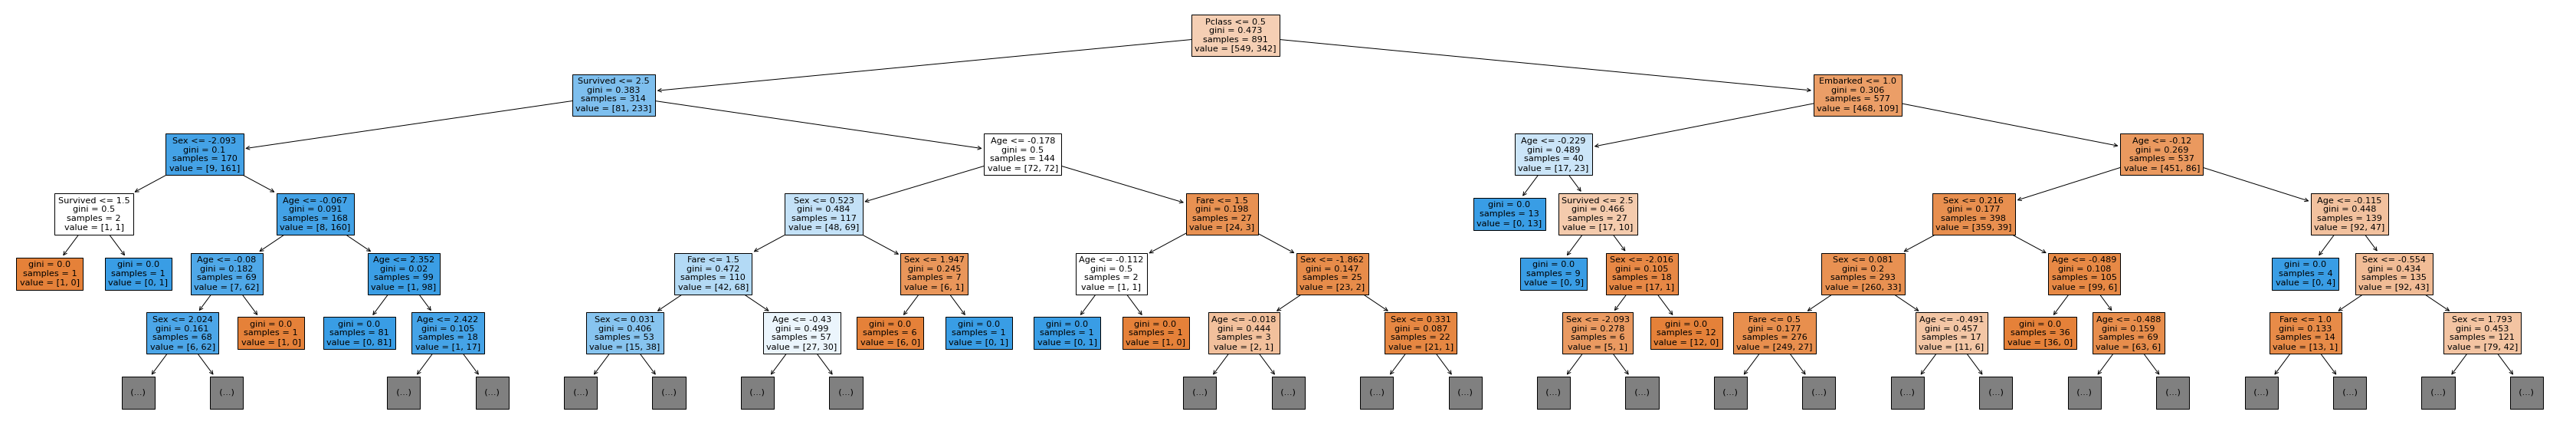

In [44]:
plt.figure(figsize = (60,10))
plot_tree(decision_tree.fit(X, y), feature_names = train_df.columns, max_depth = 5, filled = True)

In [45]:
scores = cross_val_score(decision_tree, X, y, cv=5, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())
print("Average Classification Accuracy:", round(scores.mean(),4)*100)

Scores: [0.73184358 0.76404494 0.80898876 0.75280899 0.79775281]
Mean: 0.7710878162073943
Standard Deviation: 0.028535352481575408
Average Classification Accuracy: 77.11


In [46]:
scores = cross_val_score(rf_random, X, y, cv=5, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())
print("Average Classification Accuracy:", round(scores.mean(),4)*100)

Scores: [0.84357542 0.80898876 0.83146067 0.79213483 0.84831461]
Mean: 0.8248948590797817
Standard Deviation: 0.021292163327197723
Average Classification Accuracy: 82.49
